<a href="https://colab.research.google.com/github/tarini-py/Machine-Learning/blob/main/1_cars24_class_post_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!gdown 1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR

Downloading...
From: https://drive.google.com/uc?id=1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR
To: /content/cars24-car-price-cleaned.csv
100% 1.69M/1.69M [00:00<00:00, 65.4MB/s]


In [3]:
df = pd.read_csv('cars24-car-price-cleaned.csv')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,FORD,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,0,1,1,0


In [4]:
df['make'] = df.groupby('make')['selling_price'].transform('mean')
df['model'] = df.groupby('model')['selling_price'].transform('mean')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,4.684721,1.180000,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,5.458819,4.818750,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,5.458819,3.394000,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,4.684721,2.242676,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,5.858258,6.777576,0,0,1,0,0,0,1,1,0


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,0.043684,0.689655,0.031553,0.135345,0.117891,0.066506,0.310345,0.194048,0.041550,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.252397,0.827586,0.005237,0.128448,0.177281,0.123994,0.172414,0.232517,0.218382,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2,0.089795,0.620690,0.015764,0.112069,0.177281,0.120773,0.379310,0.232517,0.149143,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,0.095134,0.689655,0.009711,0.145862,0.147808,0.100000,0.310345,0.194048,0.093193,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.262104,0.793103,0.007869,0.161810,0.221860,0.150709,0.206897,0.252367,0.313574,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [6]:
y = df['selling_price']
X = df.drop('selling_price', axis=1)
y.shape, X.shape

((19820,), (19820, 17))

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [8]:
X_train.shape

(13874, 17)

In [9]:
X_train.head()

,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
9637,0.793103,0.001290,0.182500,0.118335,0.077778,0.206897,0.190168,0.137043,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4266,0.827586,0.005763,0.110086,0.443276,0.413027,0.172414,0.823407,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6483,0.862069,0.013132,0.136810,0.216380,0.126892,0.137931,0.190168,0.348682,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
10024,0.724138,0.027343,0.103103,0.373667,0.091948,0.275862,0.324782,0.255563,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
7122,0.689655,0.013725,0.154310,0.206754,0.134879,0.310345,0.232517,0.208197,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [10]:
X1=X[['model']] # slicing - one input variable
X1_train = X_train[['model']]
X1_test = X_test[['model']]

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X1_train, y_train)

LinearRegression()

In [12]:
model.intercept_

np.float64(0.0015237505846132926)

In [13]:
model.coef_

array([0.9967642])

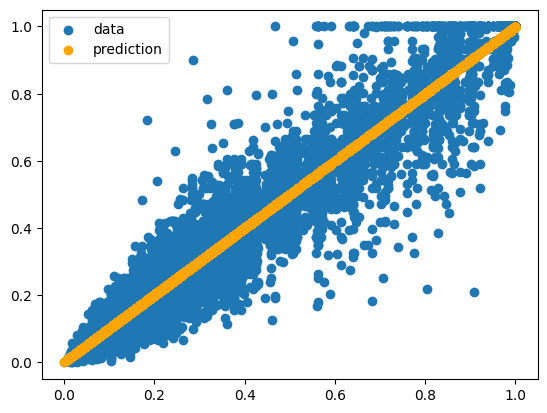

In [14]:
y_hat = model.predict(X1)
fig = plt.figure()
plt.scatter(X1,y,label='data')
plt.scatter(X1,y_hat,color='orange',label='prediction')
plt.legend()
plt.show()

In [15]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [16]:
reg.intercept_

np.float64(-0.011456351039686896)

In [17]:
reg.coef_

array([ 0.12588418, -0.25016952, -0.228541  ,  0.07508445,  0.04530473,
       -0.12588418,  0.06460638,  0.86034164, -0.00702006, -0.00703094,
        0.00672347,  0.1292155 ,  0.01603964, -0.00661902, -0.00390528,
       -0.01629955, -0.02359347])

In [18]:
y_hat = reg.predict(X_train)
y_hat_test = reg.predict(X_test)

In [19]:
y_test

,selling_price
14690,0.050965
134,0.186871
4982,0.223274
11940,0.146099
10861,0.266958
...,...
10638,0.300934
74,0.191724
18009,0.094649
19144,0.179590


In [20]:
y_hat_test

array([0.04053163, 0.21792342, 0.27513474, ..., 0.0439127 , 0.13523364,
       0.50353449])

In [21]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error

In [22]:
mse = mean_squared_error(y_test, y_hat_test)
r2 = r2_score(y_test, y_hat_test)
mae = mean_absolute_error(y_test, y_hat_test)
rmse = root_mean_squared_error(y_test, y_hat_test)

mse, r2, mae, rmse

(0.0030560118087323493,
 0.9458843076992296,
 0.03682497669463937,
 0.055281206650473445)

In [23]:
reg.coef_

array([ 0.12588418, -0.25016952, -0.228541  ,  0.07508445,  0.04530473,
       -0.12588418,  0.06460638,  0.86034164, -0.00702006, -0.00703094,
        0.00672347,  0.1292155 ,  0.01603964, -0.00661902, -0.00390528,
       -0.01629955, -0.02359347])

In [24]:
reg.intercept_

np.float64(-0.011456351039686896)

In [25]:
X_train

,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
9637,0.793103,0.001290,0.182500,0.118335,0.077778,0.206897,0.190168,0.137043,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4266,0.827586,0.005763,0.110086,0.443276,0.413027,0.172414,0.823407,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6483,0.862069,0.013132,0.136810,0.216380,0.126892,0.137931,0.190168,0.348682,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
10024,0.724138,0.027343,0.103103,0.373667,0.091948,0.275862,0.324782,0.255563,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
7122,0.689655,0.013725,0.154310,0.206754,0.134879,0.310345,0.232517,0.208197,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,0.931034,0.005237,0.164655,0.147808,0.099903,0.068966,0.194048,0.220812,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
17289,0.862069,0.010500,0.118966,0.177429,0.131562,0.137931,0.258412,0.245002,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
5192,0.827586,0.007869,0.182500,0.118335,0.077778,0.172414,0.190168,0.137106,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
12172,0.689655,0.014185,0.069397,0.322719,0.185185,0.310345,0.324782,0.232397,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [26]:
y_train

,selling_price
9637,0.106783
4266,1.000000
6483,0.349472
10024,0.203859
7122,0.218420
...,...
10955,0.259677
17289,0.228128
5192,0.152894
12172,0.194151


In [27]:
import numpy as np
import pandas as pd
class linear_regression:

    '''
    >> model = linera_regression()
    >> model.fit(X_train, y_train)
    >> model.preict(X_test)
    '''
    def __init__(self, learning_rate = 0.1, iteration = 100):

        self.learning_rate = learning_rate
        self.iteration = iteration


    def fit(self, X_train, y_train):

        self.X_train = X_train
        self.y_train = y_train

        #self.m -> no. of training samples( rows )
        #self.d -> no. of features( cols )
        self.m, self.d = X_train.shape

        #initializing Weights(self.W) and bias(self.b) with 0 to start with
        self.W = np.zeros(self.d)
        self.b = 0

        #list of error to keep track of errors
        self.errors = []

        for i in range(self.iteration):
            if i % 10 == 0:
                print('iteration - ',i)
                if self.errors != []:
                    print(self.errors[-1])

            #calculating y_hat(prediction) based on initial W, b
            y_hat = self.predict(self.X_train)

            #calculating partial derivatives
            dW = (-2) * np.dot(self.X_train.T, (self.y_train - y_hat))/self.m
            db = (-2) * np.sum((self.y_train - y_hat))/self.m

            #updating weights & bias using the above calculated derivatives
            self.W -= self.learning_rate * dW
            self.b -= self.learning_rate * db

            error = np.mean(np.square( y_train - self.predict(X_train) ))
            self.errors.append(error)

    def predict(self, X):
        #print(X.shape)
        return np.dot(X, self.W) + self.b



def score(y, y_pred):
    r2 = 1 - (np.sum(np.square(y-y_pred))/np.sum(np.square(y-np.mean(y))))
    return r2





In [28]:
model = linear_regression()

In [29]:
model.fit(X_train, y_train)

iteration -  0
iteration -  10
0.030338658192063567
iteration -  20
0.01957776272695932
iteration -  30
0.014657630362702892
iteration -  40
0.012057408310480432
iteration -  50
0.01051579383149033
iteration -  60
0.009496538891828955
iteration -  70
0.008753830602545067
iteration -  80
0.008169503336818113
iteration -  90
0.007684274931547021


In [30]:
model.W

array([ 0.15904854, -0.00448797, -0.00878323,  0.08133731,  0.09775512,
       -0.08451281,  0.21030325,  0.39872752, -0.02586265,  0.00148509,
        0.06247082,  0.00095315, -0.00167182,  0.01392036, -0.14824552,
       -0.0032593 ,  0.05697454])

In [31]:
model.predict(X_test)

array([0.04444381, 0.24409266, 0.36644328, ..., 0.08088626, 0.27772898,
       0.48647787])

In [32]:
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
r2_score(y_test, model.predict(X_test) )

0.8687787082610212

In [34]:
score(y_test, model.predict(X_test))

np.float64(0.8687787082610212)

In [35]:
model.W

array([ 0.15904854, -0.00448797, -0.00878323,  0.08133731,  0.09775512,
       -0.08451281,  0.21030325,  0.39872752, -0.02586265,  0.00148509,
        0.06247082,  0.00095315, -0.00167182,  0.01392036, -0.14824552,
       -0.0032593 ,  0.05697454])

In [36]:
!gdown 1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh

Downloading...
From: https://drive.google.com/uc?id=1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh
To: /content/cars24-car-price-clean.csv
100% 7.10M/7.10M [00:00<00:00, 68.1MB/s]


In [37]:
df = pd.read_csv('cars24-car-price-clean.csv')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-1.111046,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.801317,-0.433854,-1.125683,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
1,-0.223944,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,-0.450030,-0.327501,-0.333227,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
2,-0.915058,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,1.426990,-0.327501,-0.789807,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
3,-0.892365,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.801317,-0.433854,-0.905265,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
4,-0.182683,0.137194,-0.544502,0.760085,0.042999,0.010435,-0.137194,-0.246579,-0.013096,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728


In [38]:
X = df.drop('selling_price', axis=1)
y = df["selling_price"]

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [40]:
lr = linear_regression()
lr.fit(X_train, y_train)

iteration -  0
iteration -  10
0.09023135821347802
iteration -  20
0.07579541684148874
iteration -  30
0.06814204732858392
iteration -  40
0.06383648843229055
iteration -  50
0.06135263708667145
iteration -  60
0.05990110529527297
iteration -  70
0.05904582268259825
iteration -  80
0.058538454364435714
iteration -  90
0.05823546361785587


In [41]:
lr.predict(X_test)

array([-0.96672124, -0.3772628 ,  2.77061367, ...,  0.36166073,
       -0.62234622, -0.05386315])

In [42]:
r2_score(y_test, lr.predict(X_test))

0.9391520472871308

In [43]:
lr.W.shape,lr.b

((17,), np.float64(-0.0005880805942989352))

In [44]:
w = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

In [47]:
X_train

,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
19738,0.450030,0.615718,-1.515564,1.963710,0.055341,-0.450030,0.724475,0.485469,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,-2.249703,2.354446
17034,0.762867,0.091763,2.070095,-0.439107,-0.538932,-0.762867,-0.433854,-0.212522,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728
17080,0.137194,0.390790,0.294717,-0.439107,-0.209177,-0.137194,-0.433854,-0.075023,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,-2.249703,2.354446
7420,0.450030,-0.737872,0.259814,-0.535528,-0.695319,-0.450030,-0.778348,-0.747823,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,-2.249703,2.354446
15375,0.762867,0.306326,-0.629038,0.041071,0.406096,-0.762867,-0.177218,0.205223,-0.800710,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9372,-1.426990,2.356048,-0.582501,0.041071,0.444076,1.426990,-0.177218,-0.537901,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
7291,1.075704,-0.396574,0.532055,-0.921213,-0.694202,-1.075704,-0.433854,-0.642862,-0.800710,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
17728,1.075704,-0.389806,0.706568,-0.153700,-0.209177,-1.075704,-0.327501,0.459228,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728
7293,-0.175643,0.231356,-0.093865,-0.537456,-0.275307,0.175643,-0.433854,-0.474924,-0.800710,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728


In [134]:
class LinearRegression_NE:
    def __init__(self):
        self.W = None
        self.b = None

    def fit(self, X_train, y_train):

        self.X_train = X_train
        self.y_train = y_train


        #self.m -> no. of training samples( rows )
        #self.d -> no. of features( cols )
        self.m, self.d = self.X_train.shape
        print(self.X_train.shape)
        self.X_train = pd.concat(( pd.DataFrame(np.ones((self.m,1))), self.X_train.reset_index(drop=True)), axis = 1)
        print(self.X_train.shape)
        # inv(X_t.X).X_t.y
        self.W = pd.DataFrame(np.dot(np.linalg.inv(np.dot(self.X_train.T, self.X_train)),np.dot(self.X_train.T, self.y_train)))
        # self.W = np.linalg.inv(self.X_train.T @ self.X_train) @ (self.X_train.T @ self.y_train)

        self.b = self.W.iloc[0,0]
        self.W = self.W.iloc[1:,:]

    def predict(self, X):
        #print(X.shape)
        return np.dot(X, self.W) + self.b

In [135]:
model = LinearRegression_NE()

In [136]:
X_train.shape, y_train.shape

((15856, 17), (15856,))

In [137]:
model.fit(X_train, y_train)

(15856, 17)
(15856, 18)


In [138]:
model.W,model.b

(           0
 1   0.453645
 2  -0.031445
 3  -0.049294
 4   0.031033
 5   0.025106
 6   0.191043
 7   0.056059
 8   0.796375
 9  -0.015417
 10 -0.003365
 11  0.012086
 12  0.012494
 13  0.002309
 14 -0.029093
 15 -0.014460
 16 -0.020086
 17 -0.029230,
 np.float64(0.00019298617772903903))

In [139]:
X_test.shape, model.W.shape

((3964, 17), (17, 1))

In [141]:
model.b

np.float64(0.00019298617772903903)

In [142]:
np.dot(X_test, model.W) + model.b

array([[-1.17065641],
       [-0.23490218],
       [ 3.00643122],
       ...,
       [ 0.49204566],
       [-0.59652212],
       [-0.0786432 ]])

In [144]:
r2_score(y_test, model.predict(X_test))

0.920097045806026